# Testing of STH Simulation Python Module

Import `numpy`, `pandas` and `matplotlib`. Note that `matplotlib` is not needed for running the simulations, it is only used for plotting the results.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 6]

Import the `STH_Simulation()` function from the `helsim_RUN` module in the `sth_simulation` package.

In [2]:
from sth_simulation.helsim_RUN import STH_Simulation

The inputs of the `STH_Simulation()` function are the following:

    paramFileName: str
        This is the name of the input text file with the
        model parameters.

    demogName: str
        This is the subset of demography parameters to be
        extracted from the Demographies.txt file.

    MDAFilePath: str
        This is the path to the input CSV file with the
        MDA times and with the respective coverage
        fractions for each age group.

    PrevFilePath: str
        This is the path where the output CSV file with
        the simulated prevalence will be saved.

    RkFilePath: str
        This is the path to the input CSV file with the
        random seed, R0, and k to be used for each simulation.
        If not provided, the code will use the parameters
        in the input text file.

    nYears: int
        This is the number of years for which the
        simulations will be performed.

    outputFrequency: int
        This is the number of time points saved down
        in the CSV file for each year.

    numReps: int
        This is the number of simulations. If not provided,
        the number of simulations will be inferred from the
        input text file or CSV file.

    SaveOutput: bool
        If True, the last state of the simulations will
        be saved in a pickle file. If False, the last
        state of the simulations will not be saved.

    OutSimFilePath: str
        This is the path where the output pickle file with
        the last state of the simulations will be saved. It
        is only required when SaveOutput = True.

    InSimFilePath: str
        This is the path where the input pickle file with
        the last state of the simulations has been saved.
        If this is provided, the code will resume the
        previous simulations from this state. If this is
        not provided, the code will start new simulations
        from scratch.

The `STH_Simulation()` function saves the output CSV file with the simulated prevalence (and, if required, the output pickle file with the final state of the simulations) in the specified paths. Apart from that, the `STH_Simulation()` function does not return any objects.

## Test 1

Run the simulations for 7 years setting the output frequency equal to one month.

In [3]:
STH_Simulation(paramFileName='AscarisParameters_moderate.txt',
               demogName='KenyaKDHS',
               MDAFilePath='files/Input_MDA_23Oct20.csv',
               PrevFilePath='files/OutputPrev_STH_test_1a.csv',
               RkFilePath='files/InputRk_STH.csv',
               nYears=7,
               outputFrequency=12,
               numReps=None,
               SaveOutput=False,
               OutSimFilePath=None,
               InSimFilePath=None)

Running time: 4 seconds.


Import the output CSV file with the simulated prevalence.

In [4]:
out1a = pd.read_csv('files/OutputPrev_STH_test_1a.csv')

Display the first few rows.

In [5]:
out1a.head()

,Random Generator,R0,k,prevKKSAC year 0.0,prevKKSAC year 0.08,prevKKSAC year 0.17,prevKKSAC year 0.25,prevKKSAC year 0.33,prevKKSAC year 0.42,prevKKSAC year 0.5,...,prevKKSAC year 6.25,prevKKSAC year 6.33,prevKKSAC year 6.42,prevKKSAC year 6.5,prevKKSAC year 6.58,prevKKSAC year 6.67,prevKKSAC year 6.75,prevKKSAC year 6.83,prevKKSAC year 6.92,prevKKSAC year 7.0
0,1,3,0.240,0.481203,0.481203,0.492537,0.481481,0.500000,0.466165,0.458647,...,0.242857,0.253623,0.257353,0.311111,0.323529,0.323529,0.318519,0.362963,0.358779,0.361538
1,2,6,0.665,0.758621,0.821918,0.805369,0.796053,0.792208,0.802548,0.828025,...,0.712329,0.687075,0.743243,0.736486,0.756944,0.765517,0.791946,0.771812,0.809524,0.801370
2,3,9,0.732,0.784431,0.807229,0.800000,0.847561,0.800000,0.793750,0.796296,...,0.754967,0.776316,0.800000,0.778523,0.768212,0.788079,0.810811,0.789116,0.770270,0.816327
3,4,3,0.320,0.571429,0.568493,0.554054,0.544218,0.576389,0.569444,0.595890,...,0.392157,0.403974,0.413333,0.470199,0.493506,0.513333,0.453333,0.489933,0.500000,0.506667
4,5,6,0.240,0.577181,0.562914,0.546053,0.536424,0.546053,0.552632,0.559211,...,0.356589,0.398438,0.410853,0.465649,0.446154,0.465116,0.430769,0.433071,0.436508,0.464567


Plot the average.

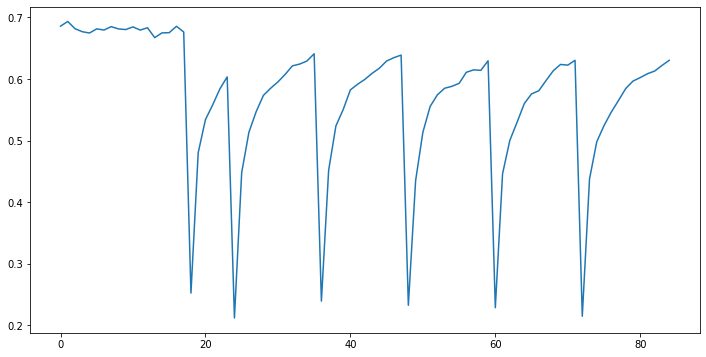

In [6]:
plt.plot(out1a.iloc[:, 3:].mean(axis=0).to_numpy())

Rerun the same simulations.

In [7]:
STH_Simulation(paramFileName='AscarisParameters_moderate.txt',
               demogName='KenyaKDHS',
               MDAFilePath='files/Input_MDA_23Oct20.csv',
               PrevFilePath='files/OutputPrev_STH_test_1b.csv',
               RkFilePath='files/InputRk_STH.csv',
               nYears=7,
               outputFrequency=12,
               numReps=None,
               SaveOutput=False,
               OutSimFilePath=None,
               InSimFilePath=None)

Running time: 3 seconds.


Import the output CSV file with the simulated prevalence.

In [8]:
out1b = pd.read_csv('files/OutputPrev_STH_test_1b.csv')

Calculate the differences.

In [9]:
diff = out1a - out1b

Display the differences for the first few rows.

In [10]:
diff.head()

,Random Generator,R0,k,prevKKSAC year 0.0,prevKKSAC year 0.08,prevKKSAC year 0.17,prevKKSAC year 0.25,prevKKSAC year 0.33,prevKKSAC year 0.42,prevKKSAC year 0.5,...,prevKKSAC year 6.25,prevKKSAC year 6.33,prevKKSAC year 6.42,prevKKSAC year 6.5,prevKKSAC year 6.58,prevKKSAC year 6.67,prevKKSAC year 6.75,prevKKSAC year 6.83,prevKKSAC year 6.92,prevKKSAC year 7.0
0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculate the largest and smallest difference.

In [11]:
print('Largest difference: ' + format(np.min(diff.values), '.2f'))
print('Smallest difference: ' + format(np.max(diff.values), '.2f'))

Largest difference: 0.00
Smallest difference: 0.00


# Test 2

Rerun the same simulations for the first 2 years keeping the output frequency equal to one month.

In [12]:
STH_Simulation(paramFileName='AscarisParameters_moderate.txt',
               demogName='KenyaKDHS',
               MDAFilePath='files/Input_MDA_23Oct20_part1.csv',
               PrevFilePath='files/OutputPrev_STH_test_2a.csv',
               RkFilePath='files/InputRk_STH.csv',
               nYears=2,
               outputFrequency=12,
               numReps=None,
               SaveOutput=True,
               OutSimFilePath='files/Output_STH_test_2a.p',
               InSimFilePath=None)

Running time: 1 seconds.


Continue the same simulations for 5 years keeping the output frequency equal to one month.

In [13]:
STH_Simulation(paramFileName='AscarisParameters_moderate.txt',
               demogName='KenyaKDHS',
               MDAFilePath='files/Input_MDA_23Oct20_part2.csv',
               PrevFilePath='files/OutputPrev_STH_test_2b.csv',
               RkFilePath='files/InputRk_STH.csv',
               nYears=5,
               outputFrequency=12,
               numReps=None,
               SaveOutput=False,
               OutSimFilePath=None,
               InSimFilePath='files/Output_STH_test_2a.p')

Running time: 3 seconds.


Import the output CSV files with the simulated prevalence.

In [14]:
out2a = pd.read_csv('files/OutputPrev_STH_test_2a.csv')
out2b = pd.read_csv('files/OutputPrev_STH_test_2b.csv')

Merge the two CSV files.

In [15]:
out2c = out2a.join(out2b.iloc[:, 3:])

Compare the output of the two separate runs to the output of the previous unique run.

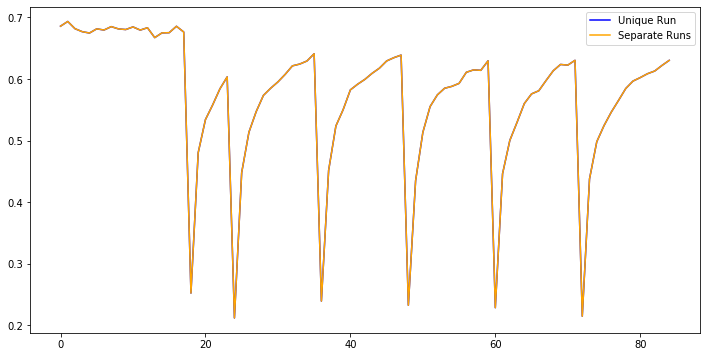

In [16]:
plt.plot(out1a.iloc[:, 3:].mean(axis=0).to_numpy(), color='blue', label='Unique Run')
plt.plot(out2c.iloc[:, 3:].mean(axis=0).to_numpy(), color='orange', label='Separate Runs')
plt.legend(loc=1)

Calculate the differences.

In [17]:
diff = out1a - out2c

Display the differences for the first few rows.

In [18]:
diff.head()

,Random Generator,R0,k,prevKKSAC year 0.0,prevKKSAC year 0.08,prevKKSAC year 0.17,prevKKSAC year 0.25,prevKKSAC year 0.33,prevKKSAC year 0.42,prevKKSAC year 0.5,...,prevKKSAC year 6.25,prevKKSAC year 6.33,prevKKSAC year 6.42,prevKKSAC year 6.5,prevKKSAC year 6.58,prevKKSAC year 6.67,prevKKSAC year 6.75,prevKKSAC year 6.83,prevKKSAC year 6.92,prevKKSAC year 7.0
0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculate the largest and smallest difference.

In [19]:
print('Largest difference: ' + format(np.min(diff.values), '.2f'))
print('Smallest difference: ' + format(np.max(diff.values), '.2f'))

Largest difference: 0.00
Smallest difference: 0.00
